### **Gibbs Sampling in Simple Terms**

Gibbs sampling is a way to sample from a multivariate distribution by updating one variable at a time, using the values of the other variables. It’s like solving a puzzle piece by piece.

---

### **Minimal Python Implementation**

Here’s a simple example of Gibbs sampling for a bivariate Gaussian distribution:

```python
import numpy as np
import matplotlib.pyplot as plt

# Parameters of the bivariate Gaussian
mu1, mu2 = 0, 0  # Means
sigma1, sigma2 = 1, 1  # Standard deviations
rho = 0.8  # Correlation coefficient

# Conditional distributions
def sample_x1_given_x2(x2):
    mean = mu1 + rho * (sigma1 / sigma2) * (x2 - mu2)
    variance = (1 - rho**2) * sigma1**2
    return np.random.normal(mean, np.sqrt(variance))

def sample_x2_given_x1(x1):
    mean = mu2 + rho * (sigma2 / sigma1) * (x1 - mu1)
    variance = (1 - rho**2) * sigma2**2
    return np.random.normal(mean, np.sqrt(variance))

# Gibbs sampling
def gibbs_sampling(iterations, burn_in):
    samples = []
    x1, x2 = 0.0, 0.0  # Start with initial values
    for i in range(iterations):
        x1 = sample_x1_given_x2(x2)  # Update x1 given x2
        x2 = sample_x2_given_x1(x1)  # Update x2 given x1
        if i >= burn_in:  # Save samples after burn-in
            samples.append([x1, x2])
    return np.array(samples)

# Run Gibbs sampling
samples = gibbs_sampling(iterations=5000, burn_in=1000)

# Plot the results
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, s=10)
plt.title("Samples from Bivariate Gaussian")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(alpha=0.3)
plt.show()
```

---

### **How It Works**

1. **Start with Initial Values**:
   - Begin with some initial guesses for $ x_1 $ and $ x_2 $ (e.g., $ x_1 = 0, x_2 = 0 $).

2. **Update One Variable at a Time**:
   - Sample $ x_1 $ given the current value of $ x_2 $.
   - Then sample $ x_2 $ given the updated value of $ x_1 $.

3. **Repeat**:
   - Keep alternating updates for a fixed number of iterations.

4. **Discard Early Samples**:
   - Ignore the first few samples (burn-in) to let the chain stabilize.

5. **Visualize**:
   - Plot the samples to see the distribution.

---

### **Why Use Gibbs Sampling?**

- **Simple**: No need for proposal distributions or acceptance probabilities.
- **Efficient**: Works well when conditional distributions are easy to sample from.
- **Useful for High Dimensions**: Can be extended to more variables.

---

### **Key Idea**

Gibbs sampling breaks down a complex multivariate problem into simpler univariate problems by sampling one variable at a time.

$$
\boxed{\text{Gibbs sampling iteratively updates each variable using its conditional distribution.}}
$$

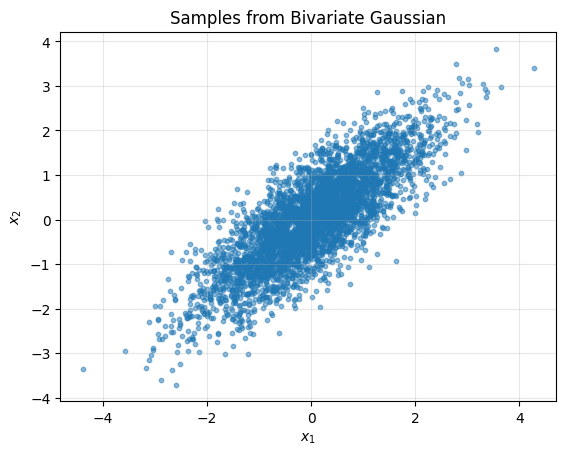

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters of the bivariate Gaussian
mu1, mu2 = 0, 0  # Means
sigma1, sigma2 = 1, 1  # Standard deviations
rho = 0.8  # Correlation coefficient

# Conditional distributions
def sample_x1_given_x2(x2):
    mean = mu1 + rho * (sigma1 / sigma2) * (x2 - mu2)
    variance = (1 - rho**2) * sigma1**2
    return np.random.normal(mean, np.sqrt(variance))

def sample_x2_given_x1(x1):
    mean = mu2 + rho * (sigma2 / sigma1) * (x1 - mu1)
    variance = (1 - rho**2) * sigma2**2
    return np.random.normal(mean, np.sqrt(variance))

# Gibbs sampling
def gibbs_sampling(iterations, burn_in):
    samples = []
    x1, x2 = 0.0, 0.0  # Start with initial values
    for i in range(iterations):
        x1 = sample_x1_given_x2(x2)  # Update x1 given x2
        x2 = sample_x2_given_x1(x1)  # Update x2 given x1
        if i >= burn_in:  # Save samples after burn-in
            samples.append([x1, x2])
    return np.array(samples)

# Run Gibbs sampling
samples = gibbs_sampling(iterations=5000, burn_in=1000)

# Plot the results
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, s=10)
plt.title("Samples from Bivariate Gaussian")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(alpha=0.3)
plt.show()